In [956]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
# pip install html5lib,beautifulsoup4
from sklearn.model_selection import GridSearchCV

In [957]:
url = 'https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/loans.csv'
df = pd.read_csv(url)
df.shape

(9578, 14)

In [958]:
df.isnull().sum()

credit.policy             0
loan_purpose              0
int.rate                  0
installment               0
log.annual.inc            4
debt_to_income            0
fico                      0
days.with.cr.line        29
revol.bal                 0
revol.util               62
recent_inq.last.6mths    29
delinquent.2yrs          29
bad_public_record        29
not.fully.paid            0
dtype: int64

In [959]:
df.dropna(thresh=df.shape[1]*0.5,axis=0,inplace=True)
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,debt_to_income,fico,days.with.cr.line,revol.bal,revol.util,recent_inq.last.6mths,delinquent.2yrs,bad_public_record,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9574.000000,9578.000000,9578.000000,9549.000000,9.578000e+03,9516.000000,9549.000000,9549.000000,9549.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.931874,12.606679,710.846314,4562.026085,1.691396e+04,46.865677,1.571578,0.163787,0.062101,0.160054
std,0.396245,0.026847,207.071301,0.614736,6.883970,37.970537,2497.985733,3.375619e+04,29.018642,2.198095,0.546712,0.262152,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.927987,12.665000,707.000000,4139.958333,8.596000e+03,46.400000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.289832,17.950000,737.000000,5730.000000,1.824950e+04,71.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [960]:
df.shape

(9578, 14)

In [961]:
print(df['delinquent.2yrs'].unique())
print(df['days.with.cr.line'].unique())
print(df['recent_inq.last.6mths'].unique())

[ 0.  1.  2.  4.  3.  5.  6. nan 13.  7.  8. 11.]
[ 5639.958333  2760.        4710.       ...  3423.041667  5916.
 10474.      ]
[ 0.  1.  2.  3.  4.  5.  6.  8.  7. 33. nan  9. 18. 14. 15. 13. 12. 10.
 19. 11. 16. 20. 27. 25. 28. 31. 24. 17. 32.]


In [962]:
df.skew(numeric_only=True)


credit.policy            -1.539621
int.rate                  0.164420
installment               0.912522
log.annual.inc            0.028703
debt_to_income            0.023941
fico                      0.471260
days.with.cr.line         1.157578
revol.bal                11.161058
revol.util                0.058099
recent_inq.last.6mths     3.604803
delinquent.2yrs           6.061788
bad_public_record         5.131172
not.fully.paid            1.854592
dtype: float64

In [963]:
df.skew(numeric_only=True)

credit.policy            -1.539621
int.rate                  0.164420
installment               0.912522
log.annual.inc            0.028703
debt_to_income            0.023941
fico                      0.471260
days.with.cr.line         1.157578
revol.bal                11.161058
revol.util                0.058099
recent_inq.last.6mths     3.604803
delinquent.2yrs           6.061788
bad_public_record         5.131172
not.fully.paid            1.854592
dtype: float64

In [964]:
df.head()

,credit.policy,loan_purpose,int.rate,installment,log.annual.inc,debt_to_income,fico,days.with.cr.line,revol.bal,revol.util,recent_inq.last.6mths,delinquent.2yrs,bad_public_record,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [965]:
# df.dropna(inplace=True)
df['revol.util'].fillna(df['revol.util'].mean(),inplace=True)
df['bad_public_record'].fillna(df['bad_public_record'].mode()[0],inplace=True)
df['delinquent.2yrs'].fillna(df['delinquent.2yrs'].mode()[0],inplace=True)
df['recent_inq.last.6mths'].fillna(df['recent_inq.last.6mths'].mode()[0],inplace=True)
df['days.with.cr.line'].fillna(df['days.with.cr.line'].mode(),inplace=True)
df.shape



(9578, 14)

In [966]:
df['not.fully.paid'].mode()[0]

0

In [967]:
print(df['recent_inq.last.6mths'].unique())

[ 0.  1.  2.  3.  4.  5.  6.  8.  7. 33.  9. 18. 14. 15. 13. 12. 10. 19.
 11. 16. 20. 27. 25. 28. 31. 24. 17. 32.]


In [968]:
df.isnull().sum()

credit.policy             0
loan_purpose              0
int.rate                  0
installment               0
log.annual.inc            4
debt_to_income            0
fico                      0
days.with.cr.line        29
revol.bal                 0
revol.util                0
recent_inq.last.6mths     0
delinquent.2yrs           0
bad_public_record         0
not.fully.paid            0
dtype: int64

In [969]:
df.skew(numeric_only=True)


credit.policy            -1.539621
int.rate                  0.164420
installment               0.912522
log.annual.inc            0.028703
debt_to_income            0.023941
fico                      0.471260
days.with.cr.line         1.157578
revol.bal                11.161058
revol.util                0.058288
recent_inq.last.6mths     3.607296
delinquent.2yrs           6.071153
bad_public_record         5.139760
not.fully.paid            1.854592
dtype: float64

In [970]:
nums=[]
for col in df.columns:
    if not (col =="loan_purpose" or col == 'not.fully.paid' or col == 'bad_public_record' or col =='credit.policy' or col == 'delinquent.2yrs'):
        nums.append(col)
cats=['not.fully.paid','bad_public_record','credit.policy','loan_purpose']
nums


['int.rate',
 'installment',
 'log.annual.inc',
 'debt_to_income',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'recent_inq.last.6mths']

In [971]:
df['delinquent.2yrs'].mode()[0]

0.0

In [972]:
for col in nums:
    threshold = 0.99
    if col == 'revol.util' or col =='fico':
        pass
    
    if col == 'revol.bal':
        thresh = df[col].quantile(0.97)
        print(thresh)
        df[col][df[col]>thresh]=thresh
    else:

        thresh = df[col].quantile(threshold)
        print(thresh)
        df[col][df[col]>thresh]=thresh

0.1886
870.39
12.484725174400003
26.242299999999993
12930.0216684
78050.32
9.0


C:\Users\Vikram k m\AppData\Local\Temp\ipykernel_45860\2157196840.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Vikram k m\AppData\Local\Temp\ipykernel_45860\2157196840.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Vikram k m\AppData\Local\Temp\ipykernel_45860\2157196840.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Vikram k m\AppData\Local\Temp\ipykernel_45860\2157196840.py:14: SettingWi

In [973]:
df['fico'].unique()

array([737, 707, 682, 712, 667, 727, 722, 677, 662, 767, 747, 702, 672,
       797, 772, 782, 802, 812, 742, 692, 777, 762, 757, 787, 717, 752,
       792, 627, 687, 697, 732, 822, 632, 807, 817, 827, 642, 647, 652,
       657, 637, 612, 617, 622], dtype=int64)

In [974]:
cats.append('delinquent.2yrs')
cats

['not.fully.paid',
 'bad_public_record',
 'credit.policy',
 'loan_purpose',
 'delinquent.2yrs']

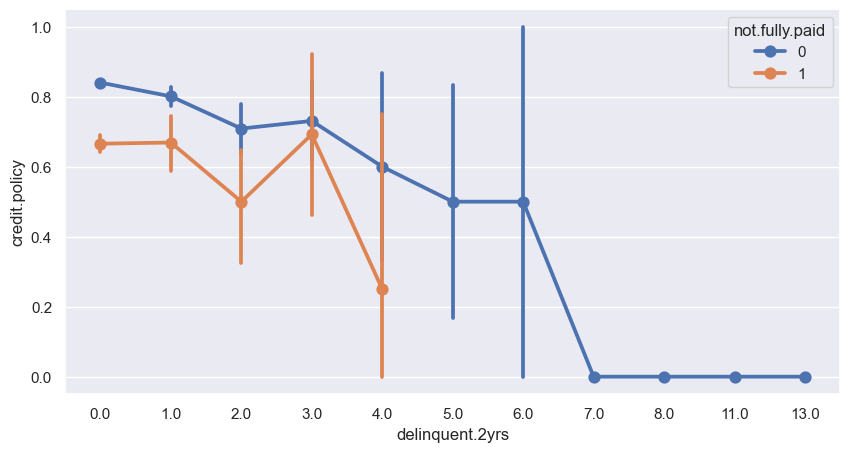

In [824]:
plt.figure(figsize=(10,5))
sn.pointplot(x='delinquent.2yrs',y='credit.policy',hue='not.fully.paid',data=df)
plt.show()

In [825]:
fig3=px.scatter(df,x=df['delinquent.2yrs'],y=df['int.rate'],color=df['not.fully.paid'])
fig3.show()

In [826]:
df.skew(numeric_only=True)

credit.policy           -1.539621
int.rate                 0.093941
installment              0.901840
log.annual.inc          -0.189170
debt_to_income          -0.003240
fico                     0.471260
days.with.cr.line        1.016631
revol.bal                1.468285
revol.util               0.058288
recent_inq.last.6mths    1.789611
delinquent.2yrs          6.071153
bad_public_record        5.139760
not.fully.paid           1.854592
dtype: float64

In [827]:
x=df[['int.rate','fico','loan_purpose','recent_inq.last.6mths','bad_public_record','revol.util']]
y=df['not.fully.paid']

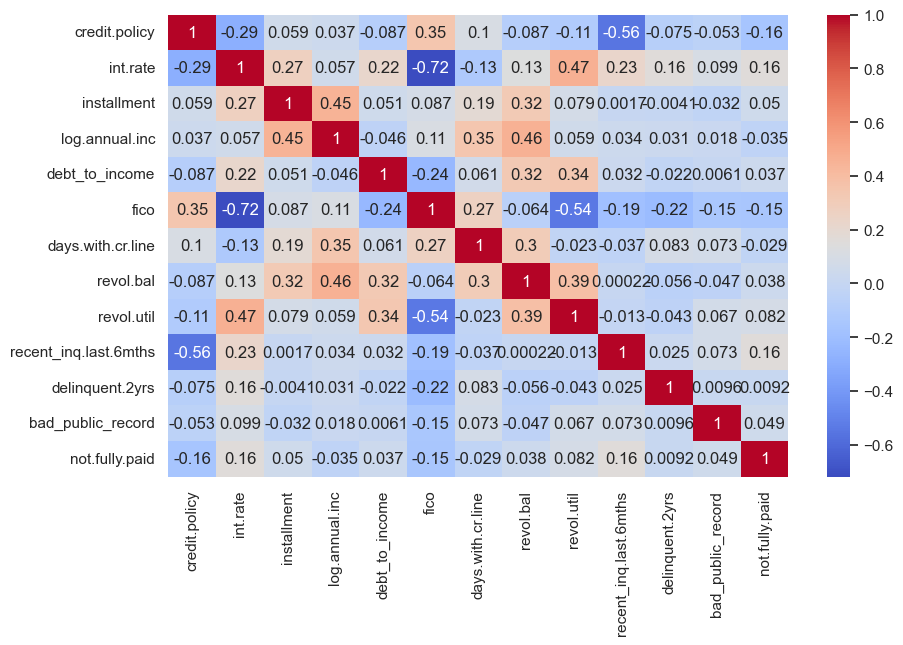

In [828]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sn.heatmap(corr,annot=True,cmap='coolwarm')   
plt.show()

In [865]:
x=df[['int.rate','fico','loan_purpose','recent_inq.last.6mths','bad_public_record','revol.util','installment']]
y=df['not.fully.paid']

In [866]:
x.head()

,int.rate,fico,loan_purpose,recent_inq.last.6mths,bad_public_record,revol.util,installment
0,0.1189,737,debt_consolidation,0.0,0.0,52.1,829.10
1,0.1071,707,credit_card,0.0,0.0,76.7,228.22
2,0.1357,682,debt_consolidation,1.0,0.0,25.6,366.86
3,0.1008,712,debt_consolidation,1.0,0.0,73.2,162.34
4,0.1426,667,credit_card,0.0,0.0,39.5,102.92


In [867]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,make_scorer,f1_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [868]:
pipeline = ColumnTransformer([("defaulter",OneHotEncoder(drop='first'),[2]),("sc",StandardScaler(),[0,1,3,4,5,6])],remainder='passthrough')
pipeline.fit(x)

ColumnTransformer(remainder='passthrough',
                  transformers=[('defaulter', OneHotEncoder(drop='first'), [2]),
                                ('sc', StandardScaler(), [0, 1, 3, 4, 5, 6])])

In [869]:
x2 = pipeline.transform(x)
pd.DataFrame(x2,columns=pipeline.get_feature_names_out()).head()

,defaulter__loan_purpose_credit_card,defaulter__loan_purpose_debt_consolidation,defaulter__loan_purpose_educational,defaulter__loan_purpose_home_improvement,defaulter__loan_purpose_major_purchase,defaulter__loan_purpose_small_business,sc__int.rate,sc__fico,sc__recent_inq.last.6mths,sc__bad_public_record,sc__revol.util,sc__installment
0,0.0,1.0,0.0,0.0,0.0,0.0,-0.136999,0.688825,-0.798694,-0.236522,0.180974,2.469914
1,1.0,0.0,0.0,0.0,0.0,0.0,-0.581103,-0.101303,-0.798694,-0.236522,1.031507,-0.439035
2,0.0,1.0,0.0,0.0,0.0,0.0,0.495284,-0.759742,-0.272747,-0.236522,-0.735250,0.232142
3,0.0,1.0,0.0,0.0,0.0,0.0,-0.818209,0.030385,-0.272747,-0.236522,0.910496,-0.757970
4,1.0,0.0,0.0,0.0,0.0,0.0,0.754972,-1.154806,-0.798694,-0.236522,-0.254665,-1.045631


In [934]:
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.1,random_state=3)
print(x.shape,xtr.shape,xts.shape)
print(y.shape,ytr.shape,yts.shape)

(9578, 7) (8620, 12) (958, 12)
(9578,) (8620,) (958,)


In [935]:
# xyz=['0.1','0.12','0.15','0.17','0.2','0.22','0.25','0.27','0.3','0.32']
# for i in range(len(xyz)):
#     xyz[i].replace("'","")
#     print(type(xyz[i]))
    
#     xtr,xts,ytr,yts = train_test_split(x2,y,test_size=(xyz[i]),random_state=3)
#     print(x.shape,xtr.shape,xts.shape)
#     print(y.shape,ytr.shape,yts.shape)


In [936]:
model = LogisticRegression()
# train the model with train data
model.fit(xtr,ytr)

LogisticRegression()

In [937]:
person = [[0.1189,737,'debt_consolidation',0.0,0.0,52.1,829.10]]
person = pipeline.transform(person)
model.predict(person)
model.predict_proba(person)

C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[0.88342661, 0.11657339]])

In [938]:
ypred = model.predict(xts)

In [939]:
def get_performance(model,xts,yts):
    ypred = model.predict(xts)
    print("Accuracy ",metrics.accuracy_score(yts,ypred))
    print("Confusion Matrix ") 
    print(metrics.confusion_matrix(yts,ypred))
    print("Recall ",metrics.recall_score(yts,ypred))
    print("Precision ",metrics.precision_score(yts,ypred))
    print("F1 Score ",metrics.f1_score(yts,ypred))
get_performance(model,xts,yts)

Accuracy  0.8475991649269311
Confusion Matrix 
[[809   3]
 [143   3]]
Recall  0.02054794520547945
Precision  0.5
F1 Score  0.039473684210526314


In [940]:
model4 = tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='log2', min_samples_leaf=25,
                       min_samples_split=40)

model4.fit(xtr,ytr)
get_performance(model4,xts,yts)

Accuracy  0.3048016701461378
Confusion Matrix 
[[155 657]
 [  9 137]]
Recall  0.9383561643835616
Precision  0.172544080604534
F1 Score  0.29148936170212764


In [941]:
print(classification_report(yts,model4.predict(xts)))

              precision    recall  f1-score   support

           0       0.95      0.19      0.32       812
           1       0.17      0.94      0.29       146

    accuracy                           0.30       958
   macro avg       0.56      0.56      0.30       958
weighted avg       0.83      0.30      0.31       958



In [942]:
print("Performance of model on test data")
get_performance(model4,xts,yts)
print("###############"*5)
print("Performance of model on train data")
get_performance(model4,xtr,ytr)

Performance of model on test data
Accuracy  0.3048016701461378
Confusion Matrix 
[[155 657]
 [  9 137]]
Recall  0.9383561643835616
Precision  0.172544080604534
F1 Score  0.29148936170212764
###########################################################################
Performance of model on train data
Accuracy  0.31705336426914155
Confusion Matrix 
[[1432 5801]
 [  86 1301]]
Recall  0.9379956741167988
Precision  0.18318783441284145
F1 Score  0.30651431263988693


In [943]:
param_grid = {"criterion":['gini','entropy'],
              "max_depth":np.arange(3,15,1),
              "min_samples_leaf":np.arange(5,30,2),
              "min_samples_split":np.arange(10,50,5),
            #   'max_features': ['log2'],
              'max_features': ['sqrt', 'log2', None],
              }
param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_samples_leaf': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
 'min_samples_split': array([10, 15, 20, 25, 30, 35, 40, 45]),
 'max_features': ['sqrt', 'log2', None]}

In [944]:
# recall_scorer = make_scorer(recall_score, pos_label=1)
# f1_scorer = make_scorer(f1_score, pos_label=1)
# search = GridSearchCV(tree.DecisionTreeClassifier(class_weight='balanced'),param_grid=param_grid,cv=5,scoring=recall_scorer,verbose=True,n_jobs=-1)
# search.fit(x2,y)
# search.best_params_
# search.best_score_


In [945]:
# print(search.best_estimator_)


In [946]:
modelx=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='log2', min_samples_leaf=25,
                       min_samples_split=40)
modelx.fit(xtr,ytr)
get_performance(modelx,xts,yts)

modely=tree.DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       max_features='log2', min_samples_leaf=27,
                       min_samples_split=35)
modely.fit(xtr,ytr)
get_performance(modely,xts,yts)

modelz=tree.DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       max_features='log2', min_samples_leaf=27,
                       min_samples_split=10)
modelz.fit(xtr,ytr)
get_performance(modelz,xts,yts)

modela=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=9, min_samples_split=10)
modela.fit(xtr,ytr)
get_performance(modela,xts,yts)

modelb= tree.DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       max_features='sqrt', min_samples_leaf=13,
                       min_samples_split=15)
modelb.fit(xtr,ytr)
get_performance(modelb,xts,yts)

modeldelin=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='log2', min_samples_leaf=5,
                       min_samples_split=40)
modeldelin.fit(xtr,ytr)
get_performance(modeldelin,xts,yts)

modelrecall = tree.DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       max_features='sqrt', min_samples_leaf=25,
                       min_samples_split=30)
modelrecall.fit(xtr,ytr)
get_performance(modelrecall,xts,yts)

modelmax1 = tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='sqrt', min_samples_leaf=11,
                       min_samples_split=20)
modelmax1.fit(xtr,ytr)
get_performance(modelmax1,xts,yts)

modelmax2 = tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=40)
modelmax2.fit(xtr,ytr)
get_performance(modelmax2,xts,yts)

Accuracy  0.38308977035490605
Confusion Matrix 
[[241 571]
 [ 20 126]]
Recall  0.863013698630137
Precision  0.18077474892395984
F1 Score  0.298932384341637
Accuracy  0.7296450939457203
Confusion Matrix 
[[652 160]
 [ 99  47]]
Recall  0.3219178082191781
Precision  0.22705314009661837
F1 Score  0.26628895184135976
Accuracy  0.37160751565762007
Confusion Matrix 
[[228 584]
 [ 18 128]]
Recall  0.8767123287671232
Precision  0.1797752808988764
F1 Score  0.29836829836829837
Accuracy  0.6576200417536534
Confusion Matrix 
[[550 262]
 [ 66  80]]
Recall  0.547945205479452
Precision  0.23391812865497075
F1 Score  0.32786885245901637
Accuracy  0.7275574112734864
Confusion Matrix 
[[638 174]
 [ 87  59]]
Recall  0.4041095890410959
Precision  0.2532188841201717
F1 Score  0.31134564643799467
Accuracy  0.3079331941544885
Confusion Matrix 
[[158 654]
 [  9 137]]
Recall  0.9383561643835616
Precision  0.1731984829329962
F1 Score  0.2924226254002134
Accuracy  0.5052192066805845
Confusion Matrix 
[[379 433]


In [947]:
print(classification_report(yts,modelx.predict(xts)))

              precision    recall  f1-score   support

           0       0.92      0.30      0.45       812
           1       0.18      0.86      0.30       146

    accuracy                           0.38       958
   macro avg       0.55      0.58      0.37       958
weighted avg       0.81      0.38      0.43       958



In [948]:
print(classification_report(yts,modely.predict(xts)))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       812
           1       0.23      0.32      0.27       146

    accuracy                           0.73       958
   macro avg       0.55      0.56      0.55       958
weighted avg       0.77      0.73      0.75       958



In [949]:
print(classification_report(yts,modelz.predict(xts)))

              precision    recall  f1-score   support

           0       0.93      0.28      0.43       812
           1       0.18      0.88      0.30       146

    accuracy                           0.37       958
   macro avg       0.55      0.58      0.36       958
weighted avg       0.81      0.37      0.41       958



In [950]:
print(classification_report(yts,modela.predict(xts)))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77       812
           1       0.23      0.55      0.33       146

    accuracy                           0.66       958
   macro avg       0.56      0.61      0.55       958
weighted avg       0.79      0.66      0.70       958



In [951]:
print(classification_report(yts,modelb.predict(xts)))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       812
           1       0.25      0.40      0.31       146

    accuracy                           0.73       958
   macro avg       0.57      0.59      0.57       958
weighted avg       0.78      0.73      0.75       958



In [952]:
print(classification_report(yts,modeldelin.predict(xts)))

              precision    recall  f1-score   support

           0       0.95      0.19      0.32       812
           1       0.17      0.94      0.29       146

    accuracy                           0.31       958
   macro avg       0.56      0.57      0.31       958
weighted avg       0.83      0.31      0.32       958



In [953]:
print(classification_report(yts,modelrecall.predict(xts)))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62       812
           1       0.20      0.72      0.31       146

    accuracy                           0.51       958
   macro avg       0.55      0.59      0.46       958
weighted avg       0.79      0.51      0.57       958



In [954]:
print(classification_report(yts,modelmax1.predict(xts)))

              precision    recall  f1-score   support

           0       0.89      0.72      0.79       812
           1       0.24      0.50      0.33       146

    accuracy                           0.68       958
   macro avg       0.57      0.61      0.56       958
weighted avg       0.79      0.68      0.72       958



In [955]:
print(classification_report(yts,modelmax2.predict(xts)))

              precision    recall  f1-score   support

           0       0.92      0.27      0.41       812
           1       0.18      0.88      0.29       146

    accuracy                           0.36       958
   macro avg       0.55      0.57      0.35       958
weighted avg       0.81      0.36      0.40       958



In [892]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=25,min_samples_split=20,max_depth=None,criterion='gini')
RFC.fit(xtr,ytr)

RandomForestClassifier(min_samples_split=20, n_estimators=25)

In [893]:
y_pred=RFC.predict(xts)
# print(confusion_matrix(yts,y_pred))
recall_1 = recall_score(yts, y_pred, pos_label=1)
print(recall_1)

0.02242152466367713


In [894]:
print(classification_report(yts,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2428
           1       0.53      0.02      0.04       446

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [895]:
modeld = KNeighborsClassifier(n_neighbors=5)
modeld.fit(xtr,ytr)

KNeighborsClassifier()

In [896]:
get_performance(modeld,xts,yts)

Accuracy  0.8187195546276966
Confusion Matrix 
[[2316  112]
 [ 409   37]]
Recall  0.08295964125560538
Precision  0.2483221476510067
F1 Score  0.12436974789915968


In [897]:
print(classification_report(yts,modeld.predict(xts)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2428
           1       0.25      0.08      0.12       446

    accuracy                           0.82      2874
   macro avg       0.55      0.52      0.51      2874
weighted avg       0.76      0.82      0.78      2874



In [898]:
n = 21
accuracy=[0]*n
ntree = [0]*n
precision = [0]*n
precarray =[]
# for j in range(10,30,2):
for i in range(1,n):
        rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=20,max_depth=None,criterion='gini')
        rfc.fit(xtr, ytr)
        rfc_pred = rfc.predict(xts)
        recall_1 = recall_score(yts, rfc_pred, pos_label=1)
        cm = confusion_matrix(yts,rfc_pred)
        
        accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
        precision[i] = precision_score(yts, rfc_pred)
        if (accuracy[i]>0.80 and precision[i]>0.50):
            number=accuracy[i],precision[i],(i*5)
            precarray.append(number)
        ntree[i]=i*5
print(precarray)

[(0.8458594293667363, 0.5652173913043478, 20), (0.8465553235908142, 0.6086956521739131, 35), (0.8451635351426583, 0.5185185185185185, 40), (0.8451635351426583, 0.5263157894736842, 50), (0.8458594293667363, 0.5555555555555556, 55), (0.8455114822546973, 0.5555555555555556, 60), (0.8462073764787752, 0.6, 70), (0.8455114822546973, 0.5555555555555556, 75), (0.8451635351426583, 0.5294117647058824, 80)]


Text(0, 0.5, 'Prediction accuracy from confusion matrix')

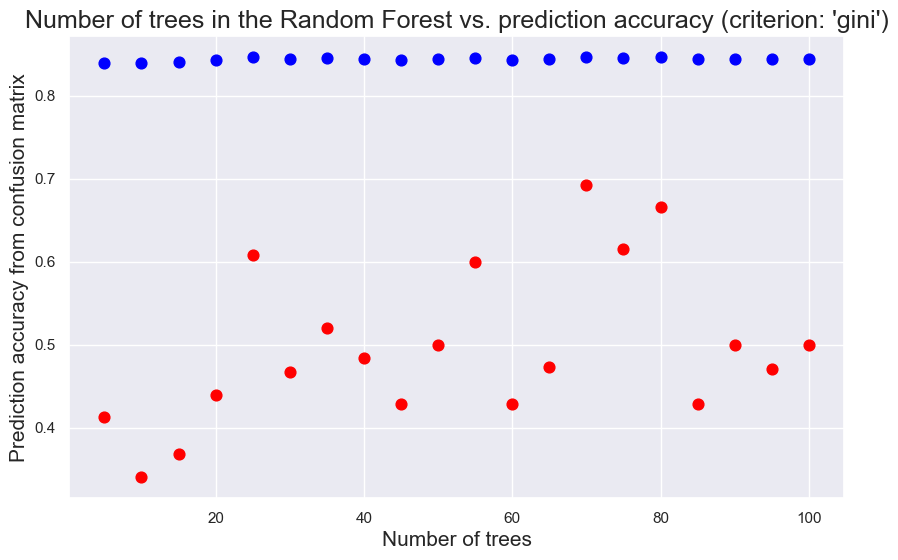

In [862]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:n],y=precision[1:n],s=60,c='red')
plt.scatter(x=ntree[1:n],y=accuracy[1:n],s=60,c='blue')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

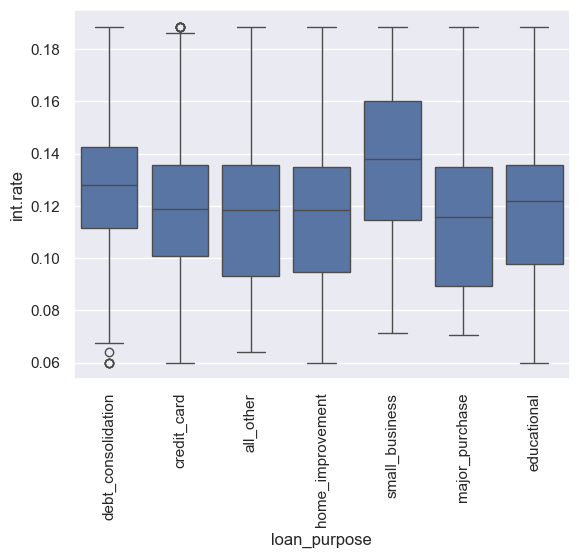

In [863]:
sn.boxplot(x="loan_purpose", y="int.rate", data=df)
plt.xticks(rotation=90)
plt.show()

In [864]:
from sklearn.svm import SVC